# Ride Fare Forecasting
-----------------------------------------------------------------

This project seeks to develop a predictive model for estimating fares for future rides on Lyft and Uber. The model takes account various factors that influence ride fares, such as distance, weather conditions, time of day, and day of the week. By integrating these diverse variables into the fare estimation process, we aim to build a more sophisticated and accurate pricing model for these popular ride-sharing services
The wealth of data accumulated by Uber and Lyft due to their extensive customer base presents an opportunity to manage and analyze this data effectively. This allows for the identification of pertinent data points and extraction of valuable insights, which can be harnessed to tackle business challenges such as predicting ride fares. Proper management and utilization of this abundant data can enable the development of comprehensive solutions that benefit these ride-sharing companies.
The objective of this predictive model is to generate fares that prioritize customer trust and satisfaction, while also considering the comfort of the driver. By prioritizing trustworthiness, the aim is to enhance the company's competitive edge by making it a preferred choice among customers. The ultimate goal is to create a pricing model that fosters customer loyalty and satisfaction while ensuring a positive experience for both passengers and drivers.

Furthermore, we have identified Uber is cheaper than Lyft.

## Problem statement
____________________________________________________


This notebook delves into the exploration of several Machine Learning models that incorporate various factors, 
such as 
1. bad weather conditions, 
2. heavy traffic, 
3. bookings made at odd hours, and 
4. high demand during weekends or peak hours

which are commonly faced while booking a cab. 

These factors are not considered in the fare generated by the Uber/Lyft system, leading to various issues such as difficulties for the driver to reach the pickup point, challenges in covering short distances, the driver compromising on sleep, frustration for the customer if the cab cancels at the last minute, and increased gas usage and expenditure. 

By taking these factors into account, the proposed Machine Learning models aim to predict a suitable fare that can lead to greater customer satisfaction, reduced driver expenditure, and improved business for Uber.

### Step 1: Data Pre-Processing 
___________________________________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv('/Users/raunakbalchandani/Downloads/updated_data/rideshare_kaggle.csv')
print(df.shape)

(693071, 57)


The data is the the form of an Excel spreadsheet and has 693071 rows and 57 columns. We are representing the data in the form of a dataframe called uber_dataset

In [5]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


As shown above, the raw data is only structured at this point. There are various datatypes in a single dataset. 
1. The dataset needs be narrowed down to a single datatype
2. The date columns need to be modified
3. The null values need to be handled
4. Special characters need to be handled

In short, the purpose of cleaning the data is to make it more meaningful for the ML model

Shown below is the metadata, and the corresponding data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

The describe() function computes a summary of statistics pertaining to the DataFrame columns. It defines the mean, std values.

In [7]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [9]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null,percent_null],axis=1,keys=["total_null","percent_null"])
missing_data.head()

,total_null,percent_null
price,55095,0.079494
id,0,0.000000
ozone,0,0.000000
temperatureLowTime,0,0.000000
apparentTemperatureHigh,0,0.000000


In [11]:
num_c = len(df._get_numeric_data().columns)  
print("Number of numeric columns:", num_c)

Number of numeric columns: 46


Price has 55095 null values that need to be handled.

In [12]:
#Finding the null Values in In column
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

### Step 2: Data Visualizations and Exploratory Data Analysis
__________________________________________________


The cab fares vary among different types of rides. The Black SUV and Lux Black XL have the highest fares, while Shared and UberPool are the most affordable. The remaining cab types have fares that are neither the highest nor the lowest. Additionally, there are more Uber rides than Lyft rides. Based on these observations, it can be **inferred** that customers may prefer to use Black SUV and Lux Black XL for longer distances, while the remaining cab types are mainly used for traveling within the city. It is also possible that Uber Pool rides are typically longer than Shared rides.

#### Gathering prices that have no value (null)

In [14]:
for j in ["price"]:
    df.loc[df.loc[:,j].isnull(),j] = df.loc[:,j].mean()
df.price.isnull().sum()

0

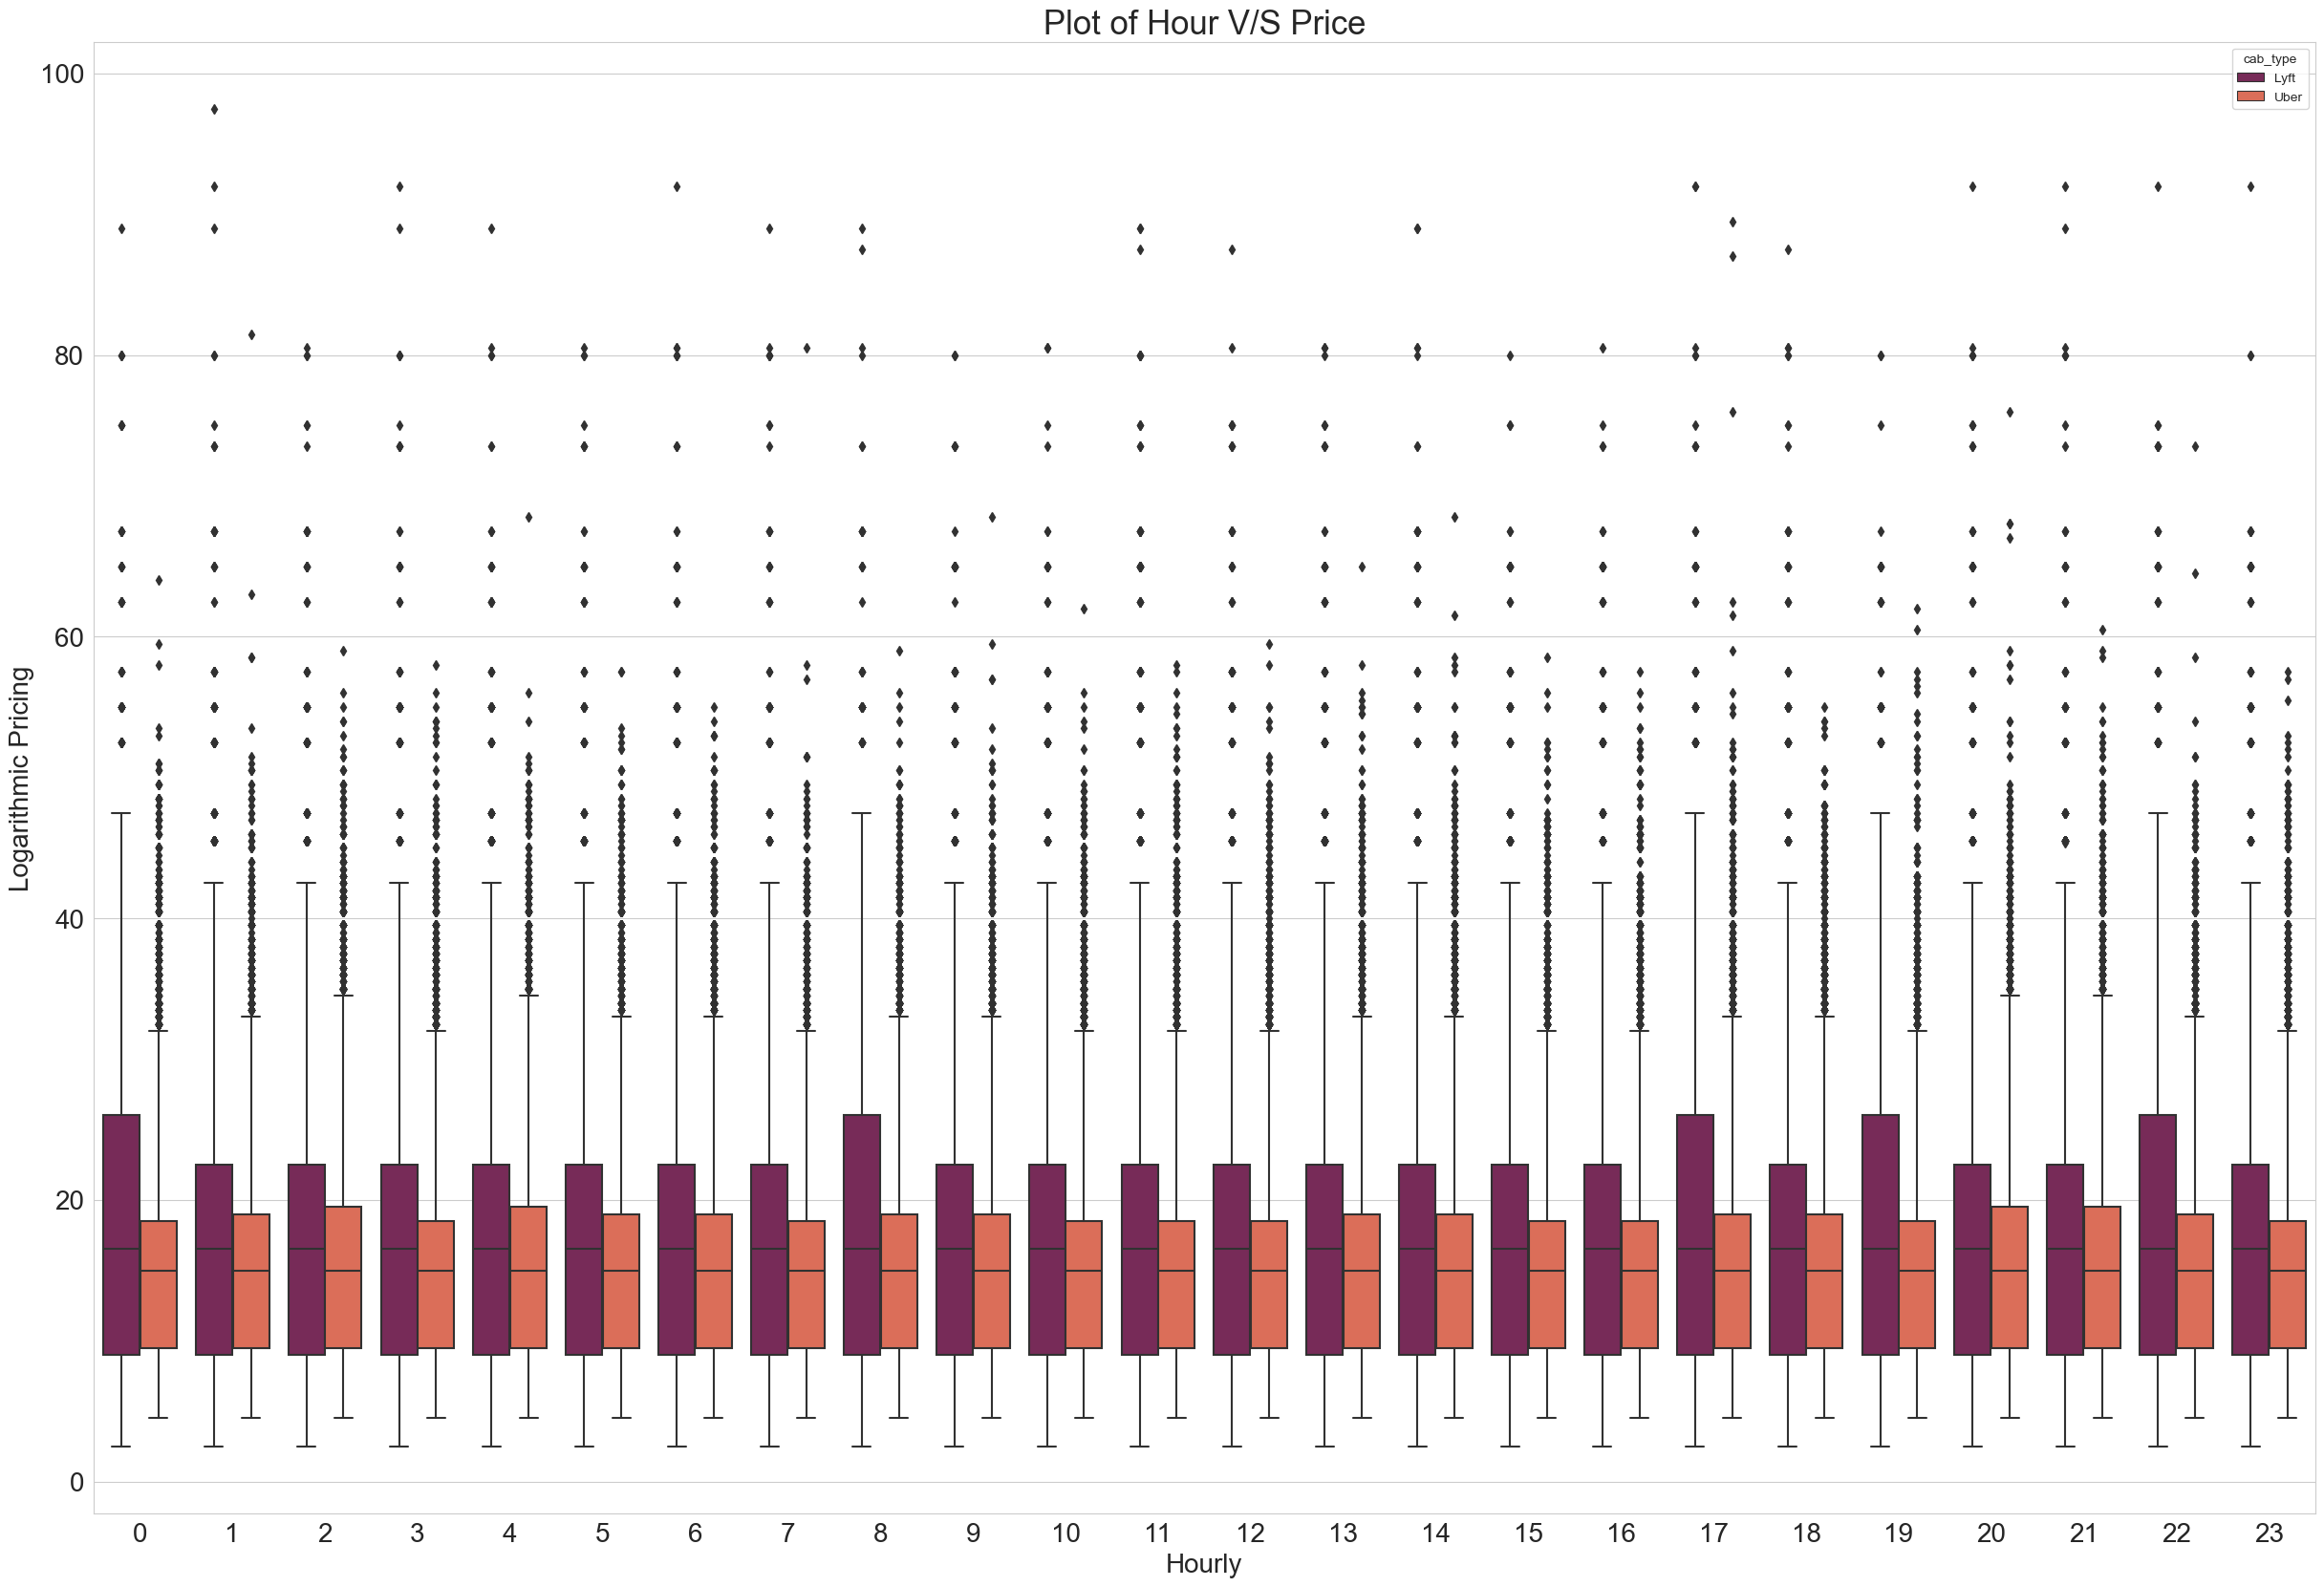

In [16]:
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="price",data=df, hue="cab_type",palette="rocket")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hourly",fontsize=20)
plt.ylabel("Logarithmic Pricing",fontsize=20)
plt.title("Plot of Hour V/S Price",fontsize=25)
plt.show()

Observation:

Price range of lyft is every time higher than uber
There are many outliers present in the data. especially in ube

Text(0, 0.5, 'Types of Cabs')

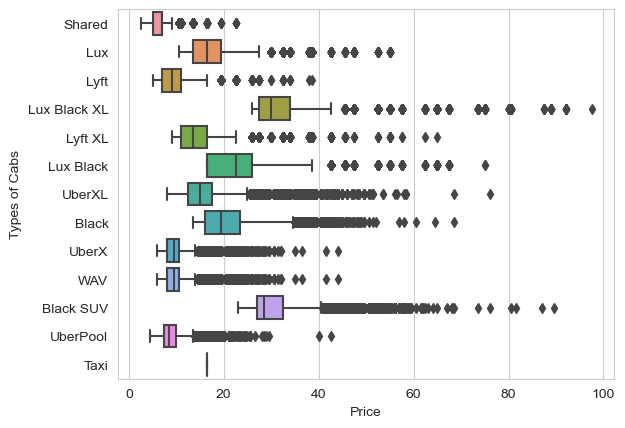

In [30]:
sns.boxplot(data=df, x='price', y='name')
plt.xlabel('Price')
plt.ylabel('Types of Cabs')


The **distribution of prices** for cab rides varies based on weather conditions. Clear nights have the highest price distribution compared to clear days. Similarly, the price distribution is highest on cloudy days than rainy days, while rainy and foggy days have lower price distributions. The density of prices is high up to $60, beyond which it tapers.

Based on these **observations**, it can be assumed that customers tend to travel shorter distances on rainy or foggy days. Cab rides during clear nights might be preferred for longer distances despite higher traffic. Customers are likely to travel within the city regardless of the weather conditions. Additionally, some customers may travel longer distances during cloudy days or nights, or experience longer wait times.

Text(0, 0.5, 'Weather')

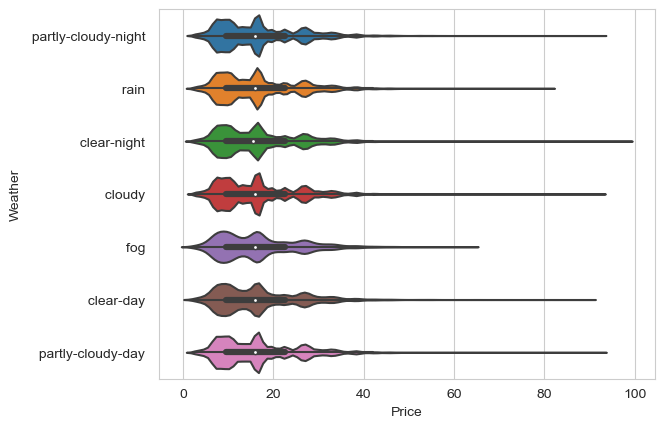

In [29]:
sns.violinplot(data=df, x='price', y='icon')
plt.xlabel('Price')
plt.ylabel('Weather')


The graph depicting the distribution of prices with respect to distance does not follow a linear pattern. Normally, the price should increase with distance, but in this instance, it does not. It is suspected that factors such as heavy traffic or unfavorable weather conditions may lead to longer wait times and subsequently drive up fares.

Text(0, 0.5, 'Distance Covered')

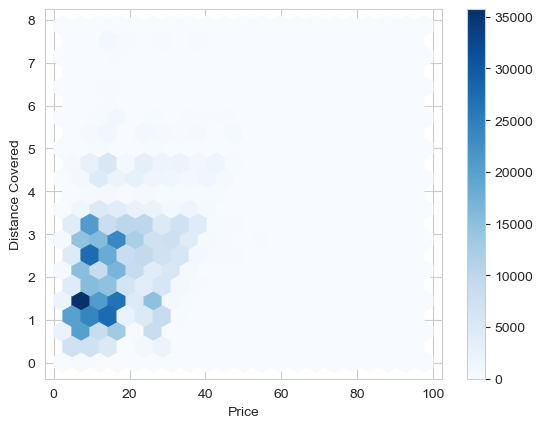

In [36]:
x = np.array(df['price'])
y = np.array(df['distance'])
plt.hexbin(x, y, gridsize=20, cmap='Blues')
plt.colorbar()
plt.xlabel('Price')
plt.ylabel('Distance Covered')

By examining the data on hour and cab fare, the following observations are made:

The frequency of cab operations remains consistent throughout the day.
The highest cab fare is observed at 1 AM.
Cab fares show a tendency to be higher between 8 PM and 8 AM, and the number of observations during these hours is relatively lower.

Text(0, 0.5, 'Fare')

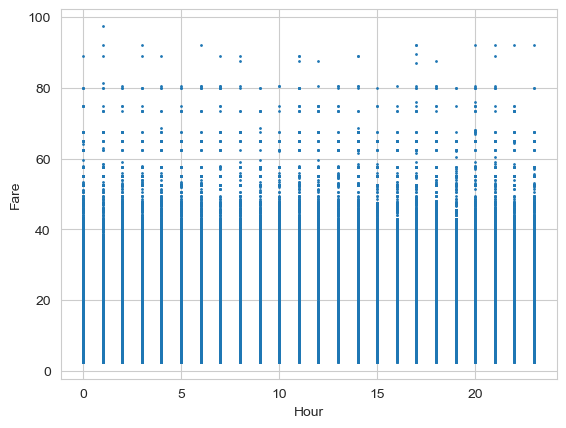

In [37]:
x=np.array(df['hour'])
y=np.array(df['price'])
plt.scatter(x,y,s=1)
plt.xlabel('Hour')
plt.ylabel('Fare')

Managing DateTime

In [38]:
df['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [17]:
from datetime import datetime
time_stamp1 = 1544952608
time_stamp2 = 1543284024
time_stamp3 = 1543818483
time_stamp4 = 1543594384
time_stamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(time_stamp1)
dt_object2 = datetime.fromtimestamp(time_stamp2)
dt_object3 = datetime.fromtimestamp(time_stamp3)
dt_object4 = datetime.fromtimestamp(time_stamp4)
dt_object5 = datetime.fromtimestamp(time_stamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 04:30:08
dt_object = 2018-11-26 21:00:24
dt_object = 2018-12-03 01:28:03
dt_object = 2018-11-30 11:13:04
dt_object = 2018-12-13 14:15:04


The data under consideration pertains to the total number of rides taken in November and December. Upon analysis, it is evident that there were more rides in December, which is likely attributed to the holiday season.

Text(0, 0.5, 'Total Ride Count')

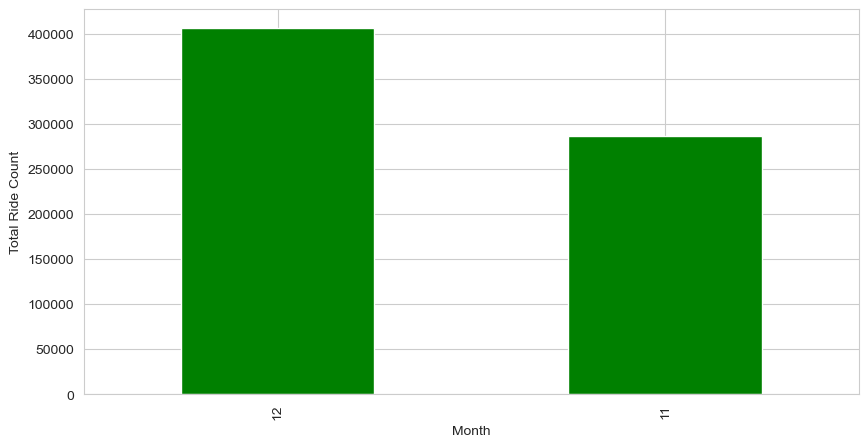

In [18]:
df['month'].value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.xlabel("Month")
plt.ylabel("Total Ride Count")

The number of people taking cabs from each origin and destination location is examined, with the following observation:

An equal number of people take cabs from each source and destination location.

Text(0, 0.5, 'Total Ride Count')

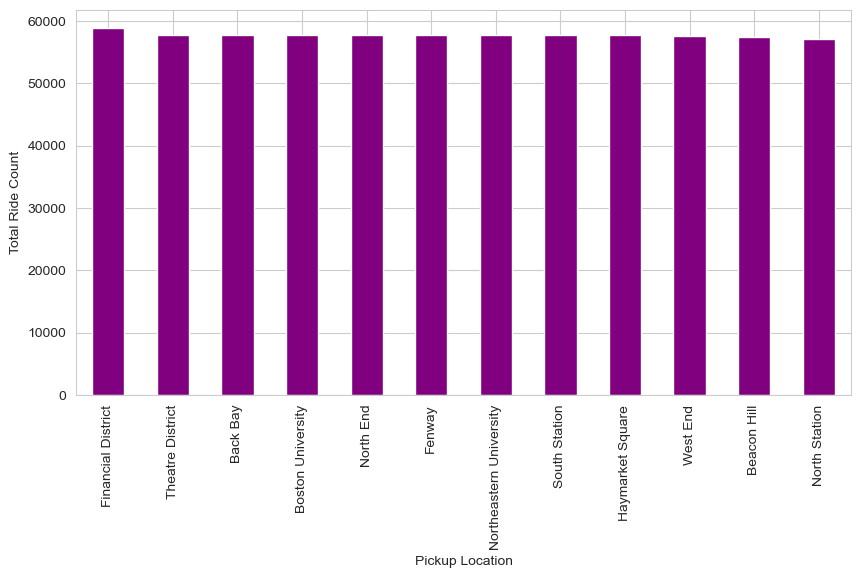

In [19]:
df['source'].value_counts().plot(kind='bar', figsize=(10,5), color='purple')
plt.xlabel("Pickup Location")
plt.ylabel("Total Ride Count")

Text(0, 0.5, 'Total Ride Count')

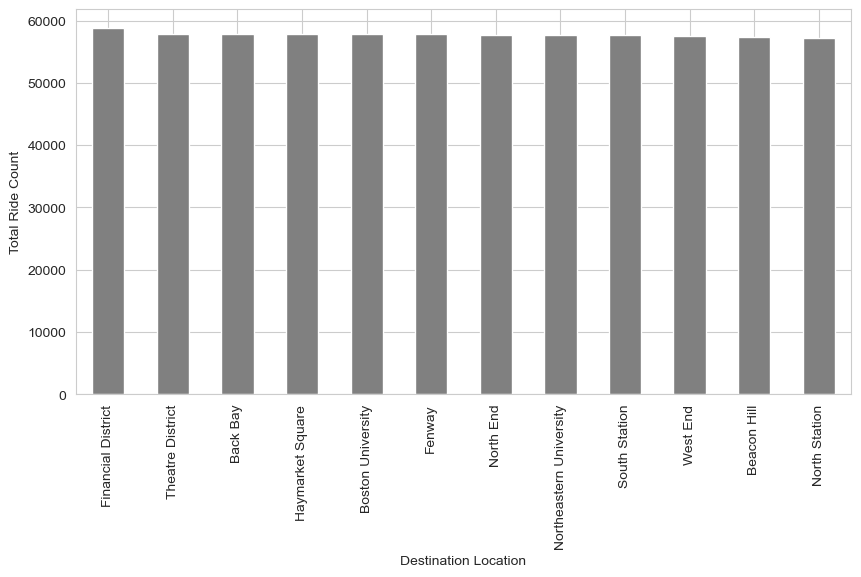

In [20]:
df['destination'].value_counts().plot(kind='bar', figsize=(10,5), color='grey')
plt.xlabel("Destination Location")
plt.ylabel("Total Ride Count")

The relationship between the ride-hailing companies Uber and Lyft and the number of customers they attract is investigated, leading to the following conclusion:

Uber is more popular than Lyft, likely due to its established presence in the market and higher level of trust among consumers, whereas Lyft is relatively new to the market.

Text(0, 0.5, 'Total Ride Count')

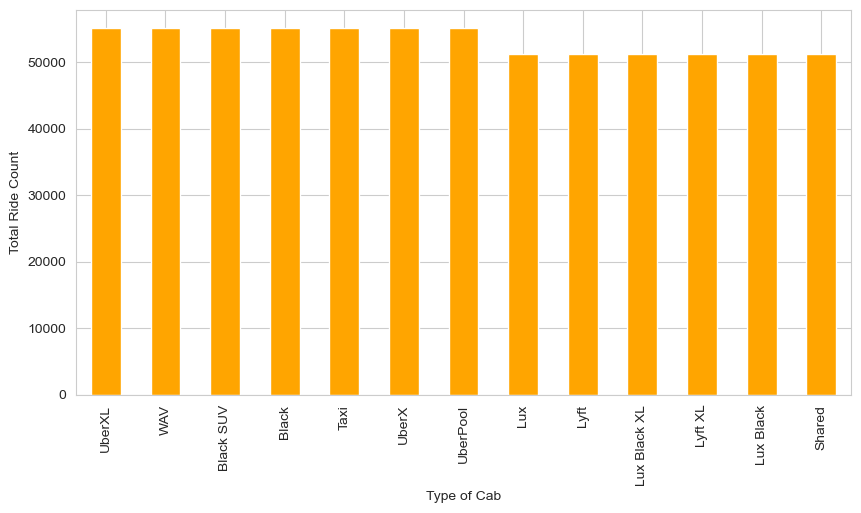

In [21]:
df['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')
plt.xlabel("Type of Cab")
plt.ylabel("Total Ride Count")

The relationship between weather conditions and the number of customers taking cabs is explored, leading to the following findings:

During the months of November and December, the weather is mostly cloudy.
Customers are more likely to take cabs on cloudy days than on rainy days, with the highest cab usage occurring on cloudy days.

Text(0, 0.5, 'Total Ride Count')

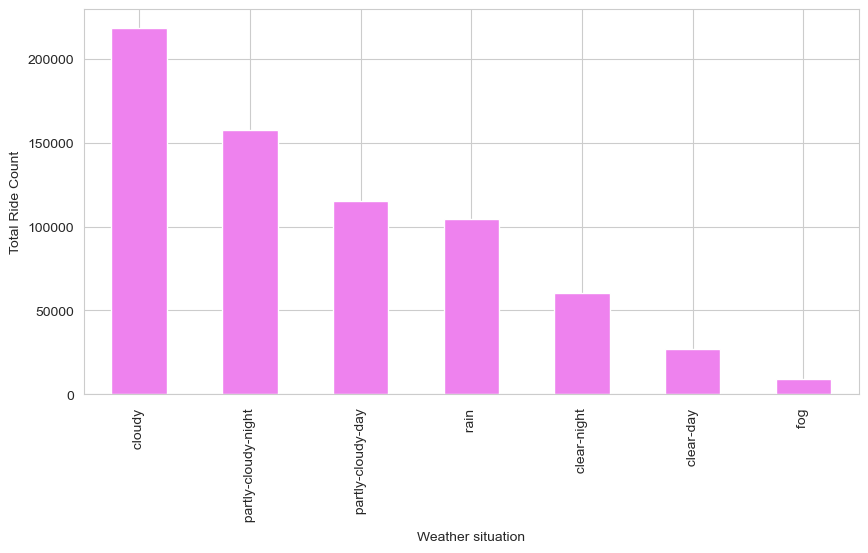

In [22]:
df['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='violet')
plt.xlabel("Weather situation")
plt.ylabel("Total Ride Count")

##### Number of customers per weekday
Monday and Tuesday have the highest number of customers

In [23]:
df['day-of-week'] = pd.to_datetime(df['datetime']).dt.day_name()

Text(0, 0.5, 'Number of customers')

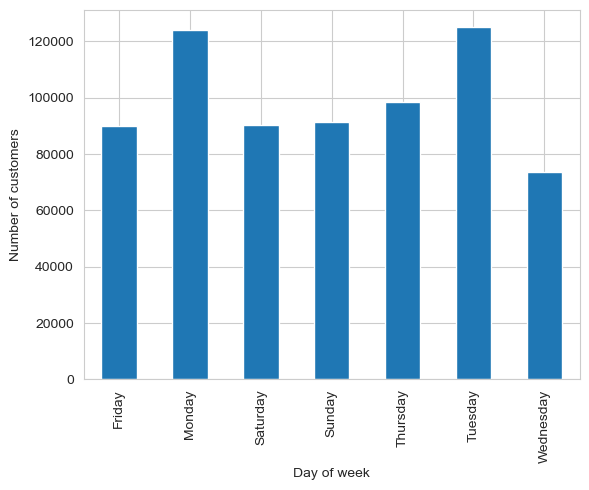

In [24]:
df.groupby('day-of-week')['id'].count().plot(kind='bar')
plt.xlabel('Day of week')
plt.ylabel('Number of customers')

### Step 3: Preparating the Data
-----------------------------------------------------

 The goal of data preparation is to ensure that the data is in a high-quality and usable state for analysis, which can help to improve the accuracy and reliability of the insights derived from it.

### Label Encoder

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

Below are the data types of each attribute before Label Encoding. The ML models are mathematical and cannot take string directly. We assign a number to each attribute so that the whole dataset is encoded and the ML model can form a mathematical correlation amongst the attributes.

In [26]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

Encoding all the columns

In [27]:
df['id']= label_encoder.fit_transform(df['id']) 
df['datetime']= label_encoder.fit_transform(df['datetime']) 
df['timezone']= label_encoder.fit_transform(df['timezone'])
df['destination']= label_encoder.fit_transform(df['destination']) 
df['product_id']= label_encoder.fit_transform(df['product_id'])
df['short_summary']= label_encoder.fit_transform(df['short_summary'])
df['long_summary']= label_encoder.fit_transform(df['long_summary'])
df['day-of-week']= label_encoder.fit_transform(df['day-of-week'])

In [28]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [29]:
df['cab_type']= label_encoder.fit_transform(df['cab_type'])

print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [30]:
df['name']= label_encoder.fit_transform(df['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [32]:
df['source']= label_encoder.fit_transform(df['source'])

print("Mapping the classes by source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Mapping the classes by source: 
0 --> 0
1 --> 1
2 --> 2
3 --> 3
4 --> 4
5 --> 5
6 --> 6
7 --> 7
8 --> 8
9 --> 9
10 --> 10
11 --> 11


In [33]:
df['icon']= label_encoder.fit_transform(df['icon'])

print("Mapping the classes by Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Mapping the classes by Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


All the encoded columns have changed to int datatype. All those columns are encoded and can be fed into ML models

In [34]:
# checking the data type after label encoding
df.dtypes

id                               int64
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int64
timezone                         int64
source                           int64
destination                      int64
cab_type                         int64
product_id                       int64
name                             int64
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int64
long_summary                     int64
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [35]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


### Categorization (Binning)

Binning is a data pre-processing technique used in data analysis and statistics, where continuous numeric variables are divided into a number of smaller, discrete intervals or categories, known as bins or buckets. This can help simplify the data and make it more manageable, and can be useful for identifying patterns or trends that might not be evident in the original data.

Binning is also called as discretization, bucketing, grouping, and categorization.

The surge multiplier values are being classified into five categories, which are numbered from 0 to 4. The surge multiplier is calculated by multiplying the wait time of the cab, which can be due to factors such as traffic or waiting for pickup, by the actual price of the cab fare. This provides an indirect representation of the wait time, and allows for the categorization of the surge multiplier values into distinct buckets for further analysis.

In [ ]:
df['surge_multiplier'].unique()

In [36]:
mapping_multiplier = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4, 2.5:5, 3.:6}
df['surge_multiplier'] = df['surge_multiplier'].map(mapping_multiplier)

In the following three cells, missing values in the dataset are being identified and replaced with the median value, which is a common practice in the field of Data Science. Missing values can occur in datasets for a variety of reasons, such as errors in data collection or entry, or due to the nature of the data itself. It is important to handle missing values appropriately, as they can have a significant impact on the accuracy and reliability of any insights derived from the data. In this case, replacing missing values with the median value can help ensure that the data remains as representative as possible, while also avoiding potential bias that might result from removing entire rows or columns containing missing values.

In [37]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [38]:
df['price'].median()

16.0

In [39]:
df["price"].fillna(13.5, inplace = True) 

In [40]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [41]:
df['price'].dtype

dtype('float64')

In [42]:
df['price'] = df['price'].astype(int)

In [43]:
df['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

### STEP 4 RFE (Recursive Feature Elimination)

Our objective is to identify correlations between the various attributes in the dataset, in order to predict the price of a cab fare. To achieve this, we need to analyze the relationship between the price (the dependent variable) and other attributes such as weather conditions and time of day (the independent variables).

To do this, we assign the price to the dependent variable y, and the other attributes to the independent variable X. We then use statistical methods to establish a mathematical equation between X and y, based on patterns that emerge in the encoded values.

By identifying these correlations, we can gain insights into the factors that influence the price of a cab fare, and use this information to make more accurate predictions in the future.

In [44]:
X = df.drop('price', axis = 1)
y = df['price']

In [45]:
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


In [46]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

In [47]:
X.shape

(693071, 57)

In [48]:
y.shape

(693071,)

The graph below illustrates the distribution of cab fares in November and December. The most commonly occurring fare is 13 USD, while the least common fare is 97 USD. This information provides insight into the range of prices that customers can expect to pay for a cab ride during these months.

Text(0, 0.5, 'Total Rides Count')

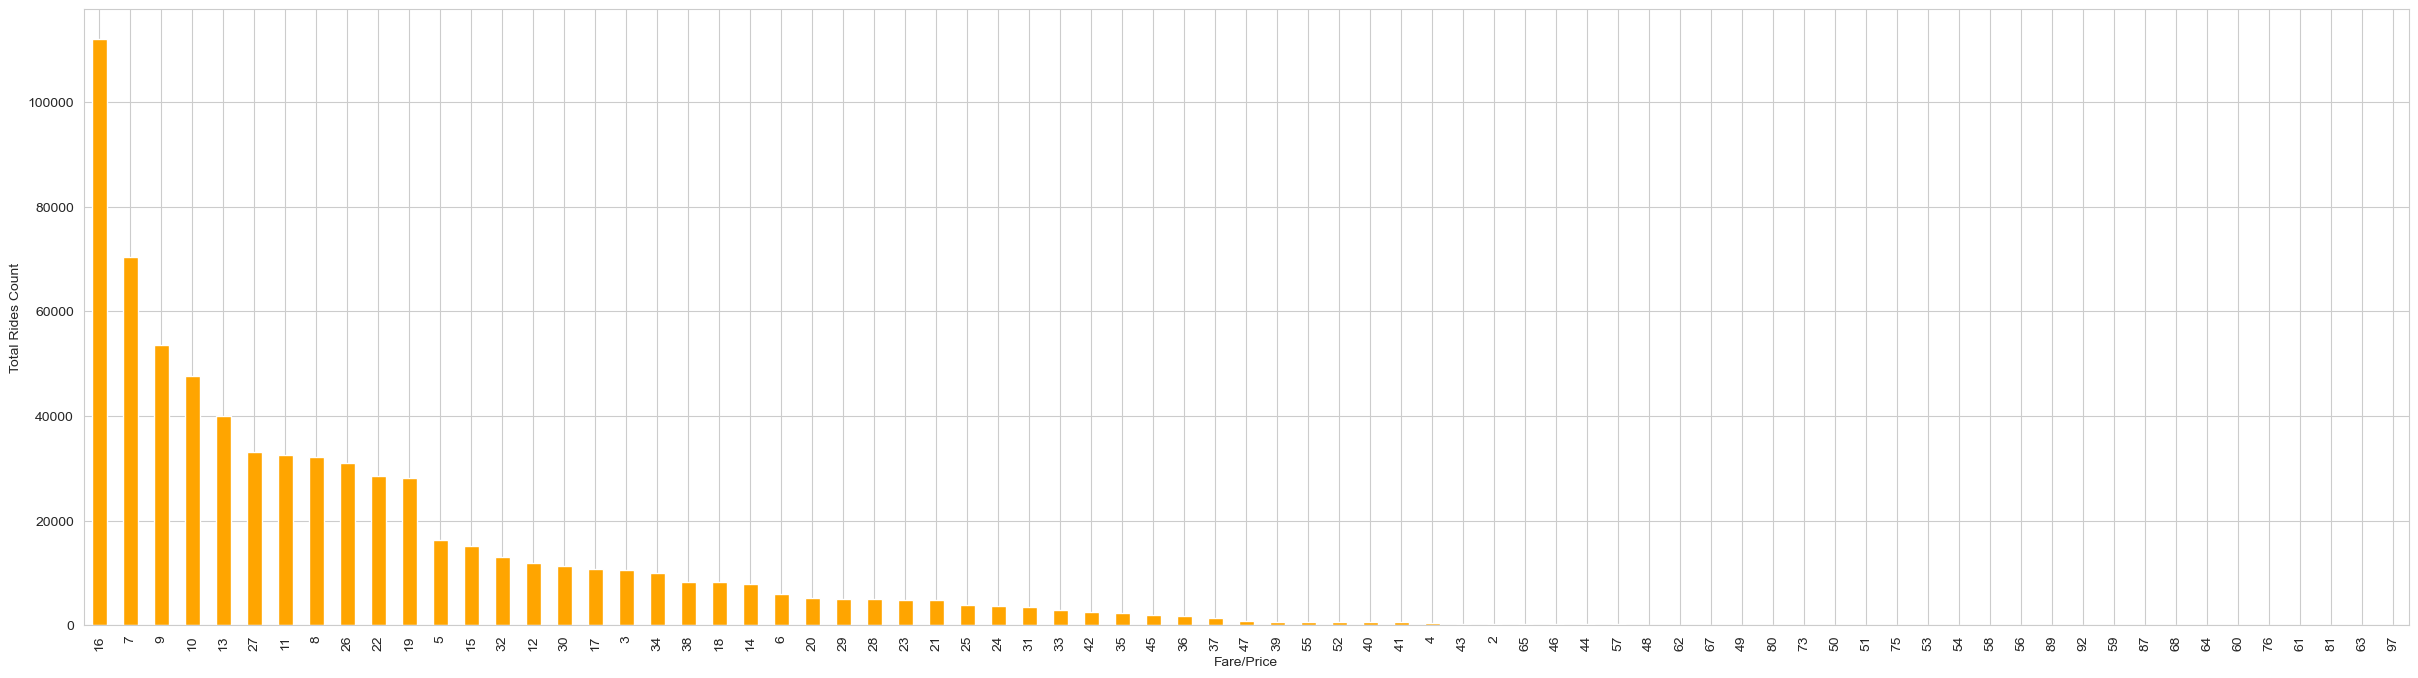

In [49]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='orange')
plt.xlabel("Fare/Price")
plt.ylabel("Total Rides Count")

#### Splitting the data set into training set and test set for training and validation of the ML Models

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
X_train.shape

(554456, 57)

In [52]:
X_test.shape

(138615, 57)

In [53]:
y_train.shape

(554456,)

In [54]:
y_test.shape

(138615,)

##### Comprehending the influence of each feature on price

In a regression model, each feature is assigned a coefficient score that indicates its relative importance in determining the outcome. The following list shows the scores assigned to each feature in this particular model:

In [55]:
#Creating model
regress = LinearRegression()
#Fitting training data
regress = regress.fit(X_train, y_train)

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.01576
Feature: 3, Score: 0.36694
Feature: 4, Score: 11.09651
Feature: 5, Score: 0.00002
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.03337
Feature: 8, Score: 0.00901
Feature: 9, Score: 8.42179
Feature: 10, Score: 0.74659
Feature: 11, Score: -1.58154
Feature: 12, Score: 2.55668
Feature: 13, Score: 5.12725
Feature: 14, Score: 1.08358
Feature: 15, Score: 1.09486
Feature: 16, Score: -0.01090
Feature: 17, Score: 0.00319
Feature: 18, Score: -0.00594
Feature: 19, Score: -0.01194
Feature: 20, Score: -0.26792
Feature: 21, Score: -0.01652
Feature: 22, Score: -0.17339
Feature: 23, Score: -0.00987
Feature: 24, Score: 0.00533
Feature: 25, Score: 0.00000
Feature: 26, Score: -0.00154
Feature: 27, Score: -0.23865
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.02729
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.14615
Feature: 32, Score: -0.00001
Feature: 33, Score: 0.02228
Feature: 34, Score: -0.00000
Feature: 35, S

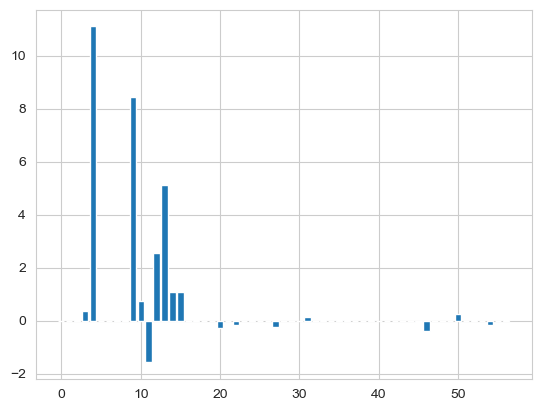

In [57]:
imp = regress.coef_
for i,v in enumerate(imp):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(imp))], imp)
plt.show()

The important features have the maximum score as listed below:

	Feature: 3, Score: 0.45864
	Feature: 4, Score: 13.84267
	Feature: 7, Score: 0.03336
	Feature: 9, Score: 7.57630
	Feature: 10, Score: 0.68070
	Feature: 12, Score: 2.55669
	Feature: 13, Score: 5.13461
	Feature: 14, Score: 1.00017
	Feature: 15, Score: 1.15865
	Feature: 35, Score: 0.00632
	Feature: 50, Score: 0.18028
	Feature: 52, Score: 0.01865
	Feature: 56, Score: 0.00481

In [108]:
print(X.columns[3])
print(X.columns[4])
print(X.columns[7])
print(X.columns[9])
print(X.columns[10])
print(X.columns[12])
print(X.columns[13])
print(X.columns[14])
print(X.columns[15])
print(X.columns[35])
print(X.columns[50])
print(X.columns[56])

day
month
source
cab_type
product_id
distance
surge_multiplier
latitude
longitude
icon
temperatureMax
day-of-week


#### Testing the training accuracy with all 56 features

In [60]:
rfe = RFE(regress,n_features_to_select=56, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.


In [61]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [62]:
XX = X[X.columns[rfe.support_]]

In [63]:
XX.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,1.544953e+09,9,16,12,25351,0,5,7,0,8,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,1.543284e+09,2,27,11,961,0,5,7,0,12,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,1.543367e+09,1,28,11,2534,0,5,7,0,7,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,1.543554e+09,4,30,11,6988,0,5,7,0,10,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,1.543463e+09,3,29,11,4400,0,5,7,0,11,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [ ]:
X_train.shape

(485149, 56)

In [66]:
#Creating model
regress1 = LinearRegression()
#Fitting training data
regress1 = regress1.fit(X_train, y_train)

In [67]:
regress1.score(X_train, y_train)

0.5245705930100821

#### Testing the training accuracy with 40 features

In [69]:
rfe = RFE(regress,n_features_to_select= 40,step=1)
rfe = rfe.fit(X, y)

In [70]:
rfe.support_

array([False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True])

In [71]:
XX = X[X.columns[rfe.support_]]

In [72]:
XX.head()

,hour,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,...,uvIndex,ozone,sunriseTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day-of-week
0,9,16,12,5,7,0,8,7,0.44,0,...,0,303.8,1544962084,0.30,0.1276,39.89,43.68,33.73,38.07,3
1,2,27,11,5,7,0,12,2,0.44,0,...,0,291.1,1543232969,0.64,0.1300,40.49,47.30,36.20,43.92,5
2,1,28,11,5,7,0,7,5,0.44,0,...,0,315.7,1543319437,0.68,0.1064,35.36,47.55,31.04,44.12,6
3,4,30,11,5,7,0,10,4,0.44,0,...,0,291.1,1543492370,0.75,0.0000,34.67,45.03,30.30,38.53,0
4,3,29,11,5,7,0,11,6,0.44,0,...,0,347.7,1543405904,0.72,0.0001,33.10,42.18,29.11,35.75,4


In [73]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [74]:
X_train.shape

(485149, 40)

In [75]:
# data modeling
regress1 = LinearRegression()
regress1 = regress1.fit(X_train, y_train)

In [76]:
regress1.score(X_train, y_train)

0.5245631097901328

#### Testing the training accuracy with 15 features

In [77]:
rfe = RFE(regress,n_features_to_select=15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [78]:
XX = X[X.columns[rfe.support_]]

In [79]:
XX.head()

,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,cloudCover,temperatureMax,apparentTemperatureMax
0,5,0,8,7,0.44,0,42.2148,-71.033,0.0000,0.68,43.68,37.95,0.72,43.68,38.07
1,5,0,12,2,0.44,0,42.2148,-71.033,0.1299,0.94,47.30,43.92,1.00,47.30,43.92
2,5,0,7,5,0.44,0,42.2148,-71.033,0.0000,0.75,47.55,44.12,0.03,47.55,44.12
3,5,0,10,4,0.44,0,42.2148,-71.033,0.0000,0.73,45.03,38.53,0.00,45.03,38.53
4,5,0,11,6,0.44,0,42.2148,-71.033,0.0000,0.70,42.18,35.75,0.44,42.18,35.75


In [80]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [84]:
X_train.shape

(485149, 15)

In [85]:
#Creating model
regress1 = LinearRegression()
#Fitting training data
regress1 = reg1.fit(X_train, y_train)

In [87]:
regress1.score(X_train, y_train)

0.5245398202716385

#### Testing the training accuracy with 25 features

In [88]:
rfe = RFE(regress, n_features_to_select=25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [89]:
XX = X[X.columns[rfe.support_]]

In [90]:
XX.head()

,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,...,windGust,temperatureHigh,apparentTemperatureHigh,dewPoint,cloudCover,uvIndex,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,16,12,5,7,0,8,7,0.44,0,42.2148,...,9.17,43.68,37.95,32.70,0.72,0,0.30,0.1276,43.68,38.07
1,27,11,5,7,0,12,2,0.44,0,42.2148,...,11.98,47.30,43.92,41.83,1.00,0,0.64,0.1300,47.30,43.92
2,28,11,5,7,0,7,5,0.44,0,42.2148,...,7.33,47.55,44.12,31.10,0.03,0,0.68,0.1064,47.55,44.12
3,30,11,5,7,0,10,4,0.44,0,42.2148,...,5.28,45.03,38.53,26.64,0.00,0,0.75,0.0000,45.03,38.53
4,29,11,5,7,0,11,6,0.44,0,42.2148,...,9.14,42.18,35.75,28.61,0.44,0,0.72,0.0001,42.18,35.75


In [91]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [92]:
X_train.shape

(485149, 25)

In [93]:
#Creating model
regress1 = LinearRegression()
#Fitting training data
regress1 = regress1.fit(X_train, y_train)
#Y prediction
Y_pred = regress1.predict(X_test)

In [94]:
regress1.score(X_train, y_train)

0.5243783881125197

#### Columns After RFE

In [95]:
XX.columns

Index(['day', 'month', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint', 'cloudCover',
       'uvIndex', 'moonPhase', 'precipIntensityMax', 'temperatureMax',
       'apparentTemperatureMax'],
      dtype='object')

In [96]:
XX.shape

(693071, 25)

In [97]:
XX.head()

,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,...,windGust,temperatureHigh,apparentTemperatureHigh,dewPoint,cloudCover,uvIndex,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,16,12,5,7,0,8,7,0.44,0,42.2148,...,9.17,43.68,37.95,32.70,0.72,0,0.30,0.1276,43.68,38.07
1,27,11,5,7,0,12,2,0.44,0,42.2148,...,11.98,47.30,43.92,41.83,1.00,0,0.64,0.1300,47.30,43.92
2,28,11,5,7,0,7,5,0.44,0,42.2148,...,7.33,47.55,44.12,31.10,0.03,0,0.68,0.1064,47.55,44.12
3,30,11,5,7,0,10,4,0.44,0,42.2148,...,5.28,45.03,38.53,26.64,0.00,0,0.75,0.0000,45.03,38.53
4,29,11,5,7,0,11,6,0.44,0,42.2148,...,9.14,42.18,35.75,28.61,0.44,0,0.72,0.0001,42.18,35.75


### STEP 6 Feature Selection

In [98]:
dropping_features = ['precipIntensity', 'humidity', 'temperatureHigh', 
        'apparentTemperatureHigh', 'dewPoint','cloudCover',
       'uvIndex', 'moonPhase', 'precipIntensityMax', 'temperatureMax',
       'apparentTemperatureMax'] #'precipProbability', # 'temperatureLow'
new_data = XX.drop(dropping_features, axis=1)

In [99]:
new_data.head()

,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,windSpeed,windGust
0,16,12,5,7,0,8,7,0.44,0,42.2148,-71.033,42.34,8.66,9.17
1,27,11,5,7,0,12,2,0.44,0,42.2148,-71.033,43.58,11.98,11.98
2,28,11,5,7,0,7,5,0.44,0,42.2148,-71.033,38.33,7.33,7.33
3,30,11,5,7,0,10,4,0.44,0,42.2148,-71.033,34.38,5.28,5.28
4,29,11,5,7,0,11,6,0.44,0,42.2148,-71.033,37.44,9.14,9.14


#### Final Dataset

In [100]:
new_data.head()

,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,windSpeed,windGust
0,16,12,5,7,0,8,7,0.44,0,42.2148,-71.033,42.34,8.66,9.17
1,27,11,5,7,0,12,2,0.44,0,42.2148,-71.033,43.58,11.98,11.98
2,28,11,5,7,0,7,5,0.44,0,42.2148,-71.033,38.33,7.33,7.33
3,30,11,5,7,0,10,4,0.44,0,42.2148,-71.033,34.38,5.28,5.28
4,29,11,5,7,0,11,6,0.44,0,42.2148,-71.033,37.44,9.14,9.14


In [101]:
new_data.fillna(0, inplace=True)

In [102]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

## STEP 7 Modelling and Testing
-----------------------------------------------------

In [103]:
new_data.shape

(693071, 14)

In [104]:
y.shape

(693071,)

In [106]:
# splittig training and testing data sets here
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(new_data, y, test_size = 0.2, random_state = 42)

In [107]:
xx_train.shape

(554456, 14)

In [108]:
xx_test.shape

(138615, 14)

In [109]:
yy_train.shape

(554456,)

In [110]:
yy_test.shape

(138615,)

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [112]:
new_data.fillna(X_train.mean(), inplace=True)

### Linear regression

In [113]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

In [114]:
linear_reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None) #normalize=False,

1. Fitting

In [115]:
linear_reg.fit(xx_train, yy_train)

LinearRegression()

2. Scoring

In [118]:
print('linear_score : ',linear_reg.score(xx_test, yy_test))
linear_score=linear_reg.score(xx_test, yy_test)

linear_score :  0.5233306112804046


#### Testing Linear Regression

In [120]:
pred = linear_reg.predict(xx_test)
pred=  pred.astype(int)

1. Actual vs Prediction

Text(0, 0.5, 'Predicted Y')

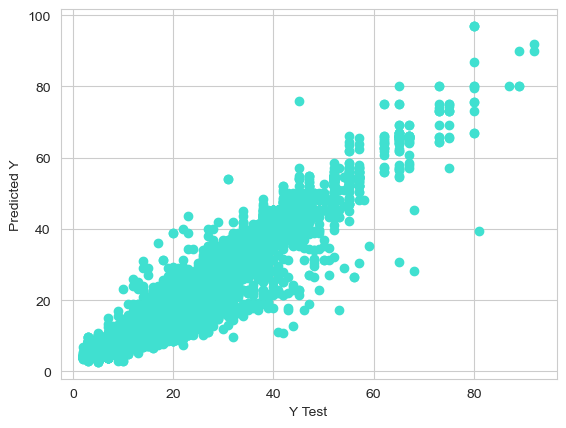

In [160]:
plt.scatter(yy_test,pred, color = 'turquoise')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# 2. Metric of linear regression model performance:

In [123]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(yy_test,pred))
print('Mean Square Error :'," ", metrics.mean_squared_error(yy_test,pred))
print('Root Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(yy_test,pred)))

Mean Absolute Error :   4.793564910002525
Mean Square Error :   38.25821159326191
Root Mean Absolute Error :   6.185322270768267


In [129]:
l_score=linear_reg.score(xx_test, yy_test)
l_MAE=metrics.mean_absolute_error(yy_test,pred)
l_MSE= metrics.mean_squared_error(yy_test,pred)
l_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,pred))

/Users/raunakbalchandani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

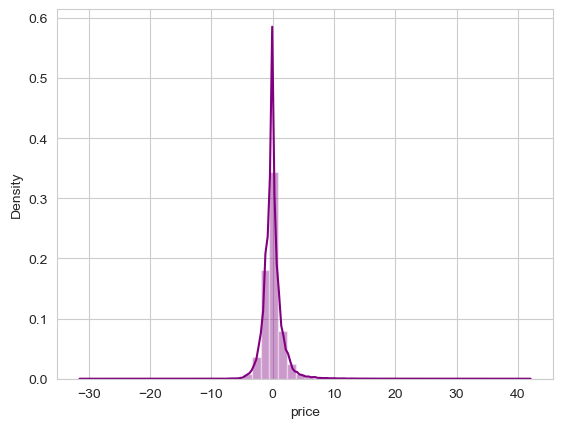

In [159]:
sns.distplot(yy_test - pred,bins=50, color = 'purple')

3. K Cross-validation

In [131]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.52577487, 0.52651742, 0.52242401, 0.52079379, 0.5191601 ])

### The price predicted by linear model seems way too high!

In [217]:
import pickle

with open('clf_model.pkl' , 'wb') as f:
    pickle.dump(linear_reg,f)
    
def predict_price_linear_reg(name, source, surge_multiplier, icon):
    loc_index = np.where(new_data.columns==name)[0]
    x = np.zeros(len(new_data.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1
    return linear_reg.predict([x])[0]

# Example usage
predicted_price = predict_price_linear_reg(2, 3, 2, 5)
print(predicted_price)

26.023236284148545


/var/folders/zd/5dj_rkd55mb8xzr38sc1qbtr0000gn/T/ipykernel_16634/3966190634.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/Users/raunakbalchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Conclusion -

Linear regression is not a good model for this data since this data is not linear. This data is too complex for a linear model.

The remaining ML Models are more robust for this data. These models learns the variety of data better.

### Decision Tree

1. Hyper performance tuning

In [132]:
dec = DecisionTreeRegressor(random_state = 0, max_depth=12)

2. Fitting

In [133]:
dec.fit(xx_train , yy_train)

DecisionTreeRegressor(max_depth=12, random_state=0)

3. Scoring

In [136]:
print('Score of Decision Tree :',dec.score(xx_test, yy_test))

Score of Decision Tree : 0.9643918188769587


#### Testing decision tree

1. Actual vs Predicted values

In [137]:
pred=dec.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

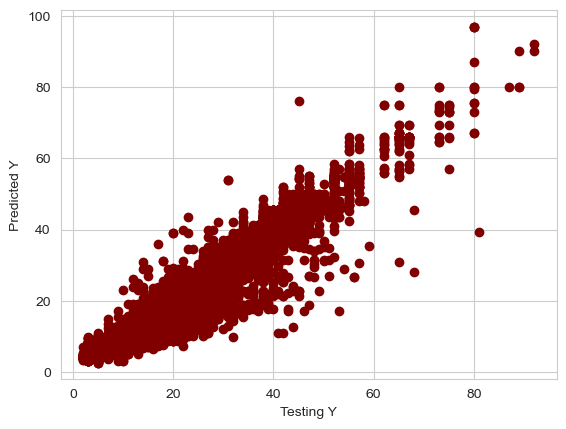

In [158]:
plt.scatter(yy_test,pred, color = 'maroon')
plt.xlabel('Testing Y')
plt.ylabel('Predicted Y')

2. Performance metric of the Decision tree model

In [140]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(yy_test,pred))
print('Mean Square Error :'," ", metrics.mean_squared_error(yy_test,pred))
print('Root Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(yy_test,pred)))

Mean Absolute Error :   1.0200105143694318
Mean Square Error :   2.8300707981618407
Root Mean Absolute Error :   1.6822814265638912


In [142]:
dec_score=dec.score(xx_test, yy_test)
decision_Mean_Absolute_Error=metrics.mean_absolute_error(yy_test,pred)
decision_Mean_Square_Error= metrics.mean_squared_error(yy_test,pred)
decision_Root_Mean_Absolute_Error=np.sqrt(metrics.mean_squared_error(yy_test,pred))

/Users/raunakbalchandani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

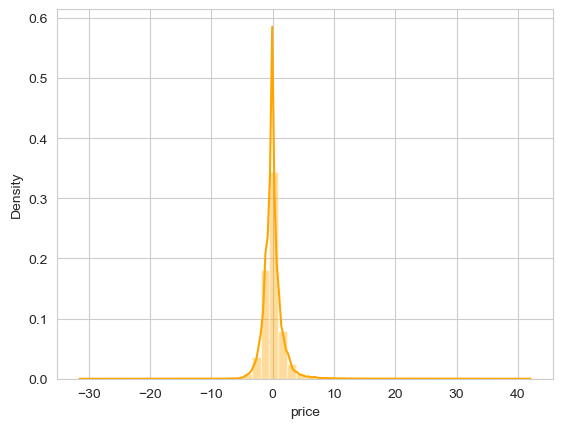

In [157]:
sns.distplot(yy_test - pred,bins=50, color = 'orange')

3. K Cross-validation for decision tree

In [144]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),xx_test,yy_test,cv=cv)

array([0.92910447, 0.93235892, 0.93398914, 0.93236445, 0.9289654 ])

In [218]:
# price prediction

import pickle

with open('dec_model.pkl' , 'wb') as f:
    pickle.dump(dec ,f)
    
with open('dec_model.pkl' , 'rb') as file:
    decision_model = pickle.load(file)
    
def predict_price_dec(name, source, surge_multiplier, icon):
    loc_index = np.where(new_data.columns==name)[0]
    x = np.zeros(len(new_data.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1
    return decision_model.predict([x])[0]

# Example usage
predicted_price = predict_price_dec(2, 3, 2, 5)
print(predicted_price)

14.925


/var/folders/zd/5dj_rkd55mb8xzr38sc1qbtr0000gn/T/ipykernel_16634/250536485.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/Users/raunakbalchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### The predicted price seems to be accurate but is still on higher side for a shared ride.

### Gradient Boosting Regressor 

#### Below cells takes some time to run around 10-15 minutes

1. Hyper performance tuning of model

In [149]:
from sklearn import ensemble
clf_model = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)

2. Fitting of the model

In [150]:
clf_model.fit(xx_train, yy_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

3. Model Score

In [151]:
print('Gradient Boosting Regressor Score :',clf_model.score(xx_test, yy_test))

Gradient Boosting Regressor Score : 0.9674994752959899


#### Testing the Gradient Booster Model

1. Actual vs Predicted

In [152]:
prediction=clf_model.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

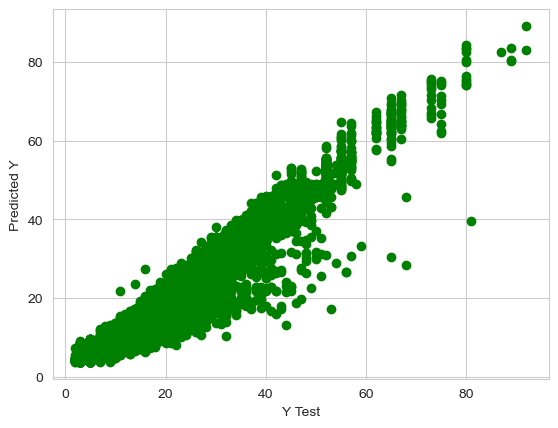

In [155]:
plt.scatter(yy_test,prediction, color = 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

2. Performace metric of Gradient Boosting Model

In [161]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('Mean Squared Error :'," ", metrics.mean_squared_error(yy_test,prediction))
print('Root Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

Mean Absolute Error :   1.0127083367925651
Mean Squared Error :   2.5830801514947015
Root Mean Absolute Error :   1.6071963637013063


In [190]:
GBR_Score=clf_model.score(xx_test, yy_test)
GBR_MAE=metrics.mean_absolute_error(yy_test,prediction)
GBR_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))
GBR_MSE = metrics.mean_squared_error(yy_test,prediction)

/Users/raunakbalchandani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

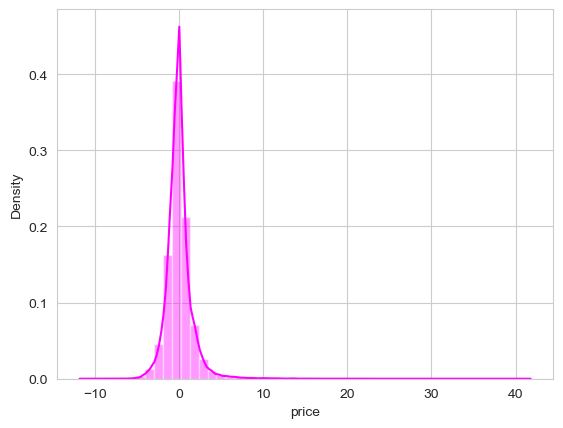

In [191]:
sns.distplot(yy_test - prediction,bins=50, color = 'magenta')

#### Price prediction function

In [219]:
# price prediction

import pickle

with open('clf_model.pkl' , 'wb') as f:
    pickle.dump(clf_model ,f)
    
with open('clf_model.pkl' , 'rb') as file:
    clf_model = pickle.load(file)
    
def predict_price_dec(name, source, surge_multiplier, icon):
    loc_index = np.where(new_data.columns==name)[0]
    x = np.zeros(len(new_data.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1
    return clf_model.predict([x])[0]

# Example usage
predicted_price = predict_price_dec(2, 3, 2, 5)
print(predicted_price)

14.483865990280506


/var/folders/zd/5dj_rkd55mb8xzr38sc1qbtr0000gn/T/ipykernel_16634/241215621.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/Users/raunakbalchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


#### The price predicted is similar to decision tree which in turn allows us to confirm the accurate predicted price for the shared ride.

####  Followed  these definitions previously set before predicting the price:

-  **For cab_name**: Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5


- **For Source**: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11


- **For Surge_multiplier** : Enter Surge Multiplier value from 0 to 4


- **for Icon**:  clear-day  --> 0 , clear-night  --> 1 , cloudy  --> 2 , fog  --> 3 , partly-cloudy-day  --> 4 , partly-cloudy-night  --> 5 , rain  --> 6



# Result Metrics

Text(0.5, 0, 'algorithm')

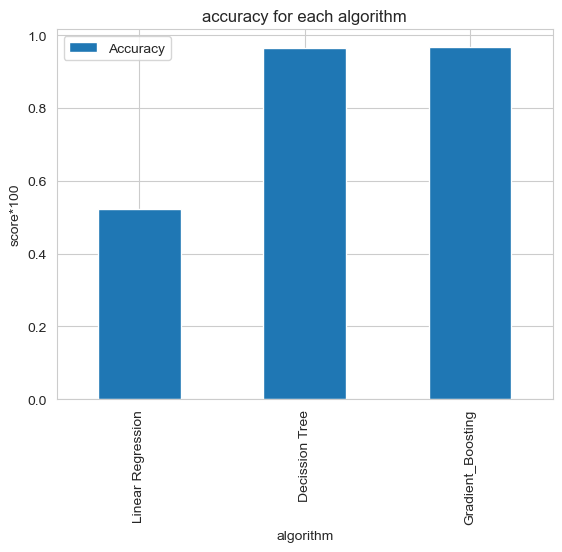

In [220]:
l1=['Linear Regression',linear_score]
l2=['Decission Tree',dec_score]
l3=['Gradient_Boosting',GBR_Score]
cols=['Algo','Accuracy']
df= pd.DataFrame([list(l1),list(l2),list(l3)],columns=cols)
df.set_index('Algo').plot(kind='bar')
plt.title("accuracy for each algorithm")
plt.ylabel("score*100")
plt.xlabel("algorithm")

In [221]:
l1=['Linear Regression',linear_MAE,linear_MSE,linear_RMAE]
l2=['Decission Tree',decision_Mean_Absolute_Error,decision_Mean_Square_Error,decision_Root_Mean_Absolute_Error]
l3=['Gradient_Boosting',GBR_MAE,GBR_MSE,GBR_RMAE]
cols=['Algo','MAE','MSE','RMAE']

In [222]:
df= pd.DataFrame([list(l1),list(l2),list(l3)],columns=cols)


In [223]:
df

,Algo,MAE,MSE,RMAE
0,Linear Regression,4.793565,38.258212,6.185322
1,Decission Tree,1.020011,2.830071,1.682281
2,Gradient_Boosting,1.012708,2.583080,1.607196


Text(0, 0.5, 'algorithm')

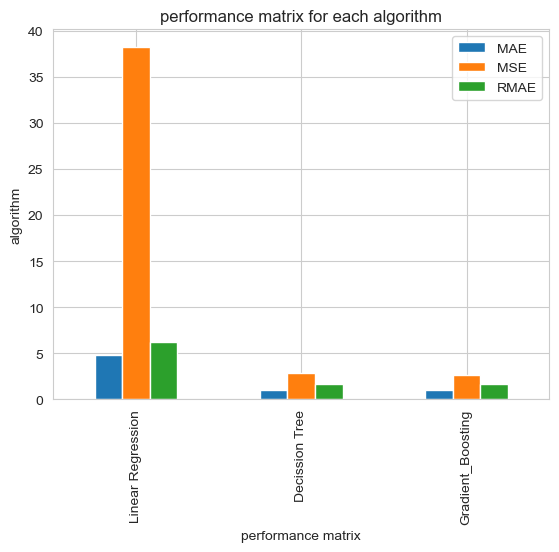

In [224]:
df.set_index('Algo').plot(kind='bar')
plt.title("performance matrix for each algorithm")
plt.xlabel("performance matrix")
plt.ylabel("algorithm")

The attributes on the left side that is red color coded has more impact on the price than the blue portion. That is, surge multiplier, product ID, Name and distance.